In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
image_w = 128
image_h = 128

X = []
y = []

In [2]:
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
#np_load_old = np.load
#np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
#np.load = np_load_old

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-10.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(4013, 128, 128, 3)
4013


In [3]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [4]:
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-1-1.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=2)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
__________

In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4013 samples, validate on 1338 samples
Epoch 1/50




4013/4013 [==============================] - 16s 4ms/step - loss: 2.5622 - acc: 0.2537 - val_loss: 1.6438 - val_acc: 0.4081

Epoch 00001: val_loss improved from inf to 1.64377, saving model to ./test/food-1-1.model
Epoch 2/50
4013/4013 [==============================] - 11s 3ms/step - loss: 1.2381 - acc: 0.5420 - val_loss: 1.0491 - val_acc: 0.6293

Epoch 00002: val_loss improved from 1.64377 to 1.04910, saving model to ./test/food-1-1.model
Epoch 3/50
4013/4013 [==============================] - 11s 3ms/step - loss: 0.9986 - acc: 0.6230 - val_loss: 0.9747 - val_acc: 0.6360

Epoch 00003: val_loss improved from 1.04910 to 0.97466, saving model to ./test/food-1-1.model
Epoch 4/50
4013/4013 [==============================] - 11s 3ms/step - loss: 0.8562 - acc: 0.6756 - val_loss: 0.9211 - val_acc: 0.6644

Epoch 00004: val_loss improved

In [7]:
print("test : 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
print("train : 정확도 : %.4f" % (model.evaluate(X_train, y_train)[1]))


1338/1338 [==============================] - 1s 716us/step
test : 정확도 : 0.7182
4013/4013 [==============================] - 3s 684us/step
train : 정확도 : 0.9230


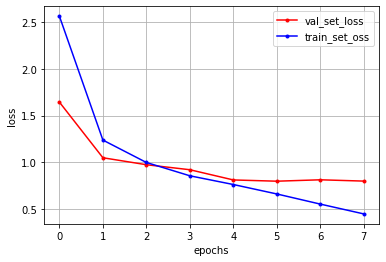

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [4]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
print(categories)
image_w = 128
image_h = 128


X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./test/food-1-1.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
  

['캡처1.PNG', '캡처10.PNG', '캡처11.PNG', '캡처12.PNG', '캡처2.PNG', '캡처4.PNG', '캡처5.PNG', '캡처8.PNG', '캡처9.PNG']
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
7
해당 이미지는 오징어채볶음로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
3
해당 이미지는 메추리알장조림로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
2
해당 이미지는 고사리나물로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
7
해당 이미지는 오징어채볶음로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
2
해당 이미지는 고사리나물로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
5
해당 이미지는 애호박볶음로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
5
해당 이미지는 애호박볶음로 추정됩니다.


In [ ]:
#----추가 

In [ ]:
# ----------------------------------------------------------
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-10.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [ ]:
import keras
from keras.layers import ELU
from keras.layers import BatchNormalization , LeakyReLU
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal')) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-10.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [7]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
print(categories)
image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-10.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

['캡처1.PNG', '캡처10.PNG', '캡처11.PNG', '캡처12.PNG', '캡처2.PNG', '캡처4.PNG', '캡처5.PNG', '캡처8.PNG', '캡처9.PNG']
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
3
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 메추리알장조림로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
3
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 메추리알장조림로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
0
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 갈치구이로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
2
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 고사리나물로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
7
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 해당 이미지는 오징어채볶음로 추정됩니다.
[0.000 